Number of training examples:  1257
Number of test examples:  540
Number of total examples: 1797


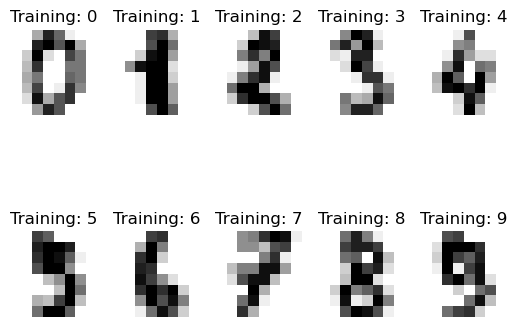

In [80]:
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

digits = datasets.load_digits()

# Split data into 70/30 Train/Test data
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3, random_state=None)

print("Number of training examples: ",len(X_train))
print("Number of test examples: ",len(X_test))
print("Number of total examples:", len(X_train)+len(X_test))


images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)




UMAP-Reducer

c:\Users\jonat\anaconda3\envs\EDAN96\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


(1797, 2)


Text(0.5, 1.0, 'UMAP projection of the Digits dataset')

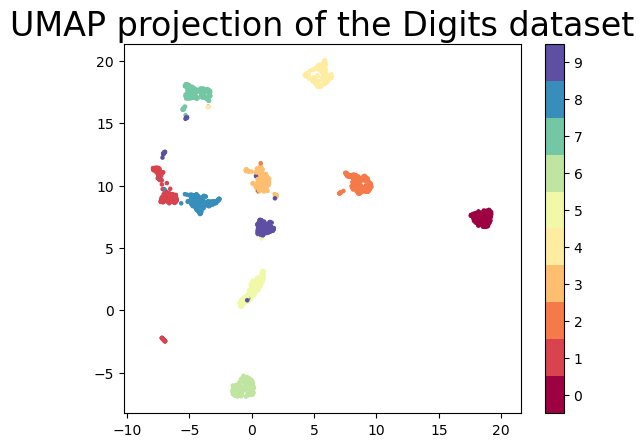

In [81]:
import matplotlib.pyplot as plt 
import numpy as np
import umap

reducer = umap.UMAP(random_state=42)
reducer.fit(digits.data)
embedding = reducer.transform(digits.data)

print(embedding.shape)
plt.scatter(embedding[:, 0], embedding[:, 1], c=digits.target, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the Digits dataset', fontsize=24)





Cosine similarity

Cosine Similarity:
 [[0.96953736 0.61422565 0.70985123 ... 0.78054372 0.85063932 0.81182654]
 [0.64057712 0.95983463 0.87401958 ... 0.91604527 0.80267119 0.84447725]
 [0.69033218 0.80485635 0.82590236 ... 0.84017123 0.75221714 0.84761052]
 ...
 [0.69534056 0.77964591 0.77998321 ... 0.80155401 0.76388727 0.75906702]
 [0.78048386 0.85403808 0.85962083 ... 0.94412191 0.86535741 0.92310303]
 [0.82650128 0.73784076 0.72941315 ... 0.80488239 0.92850174 0.86380316]]
(10, 1797)


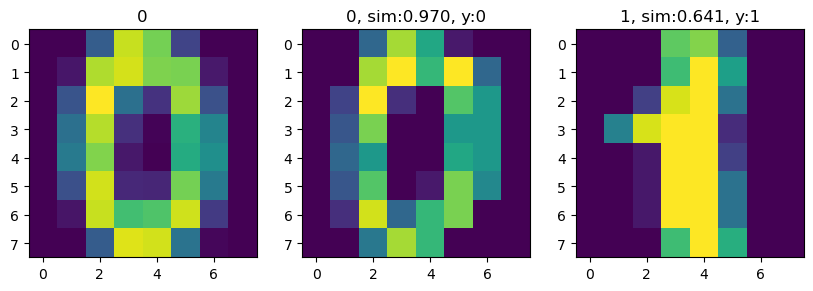

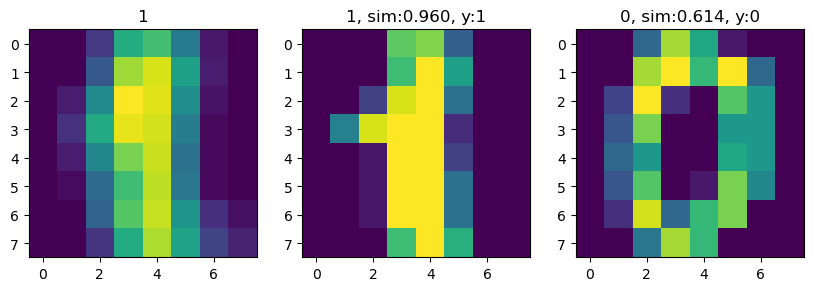

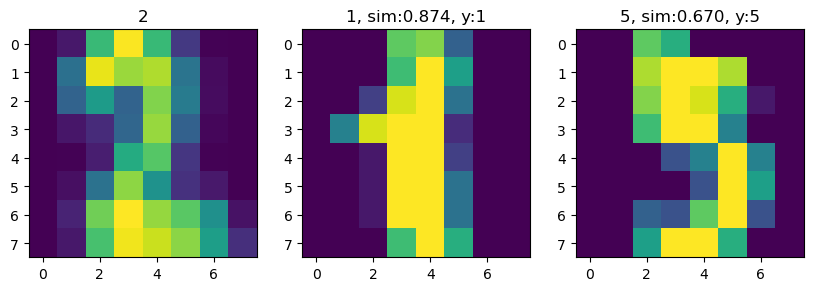

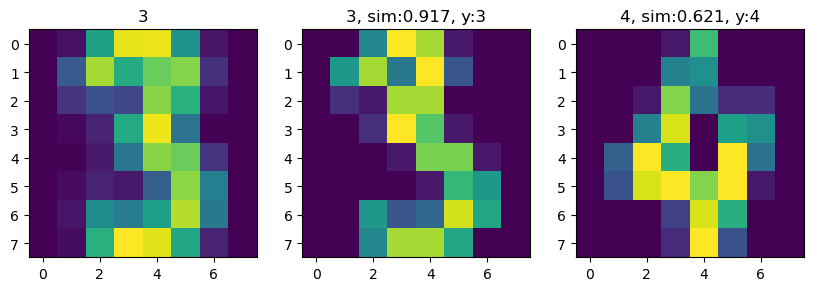

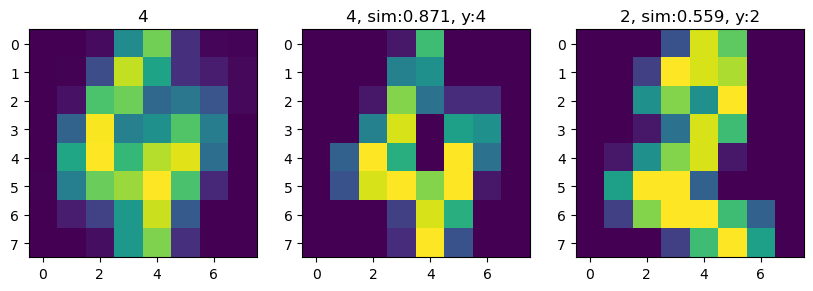

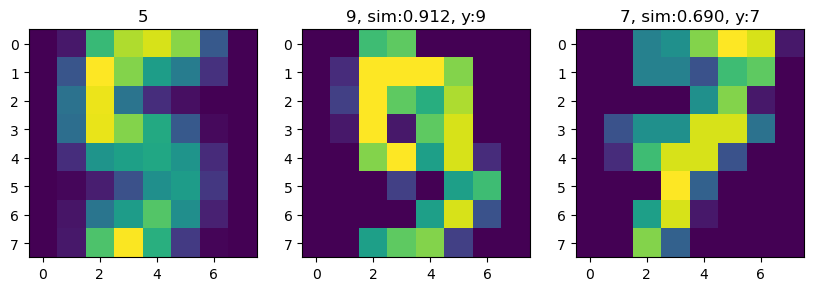

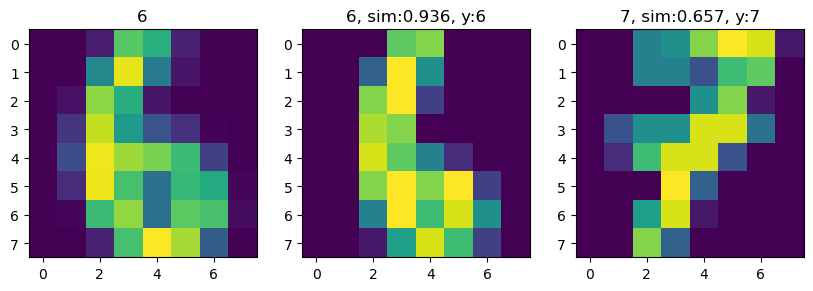

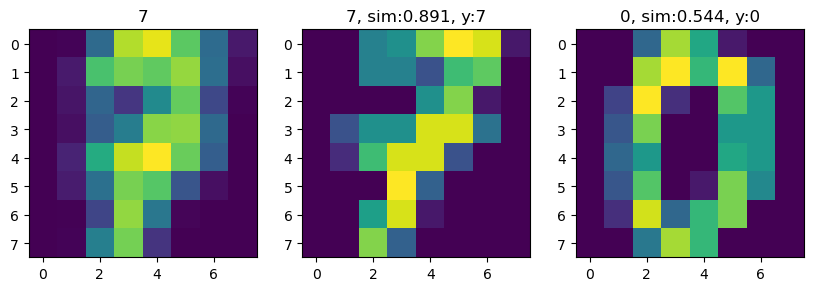

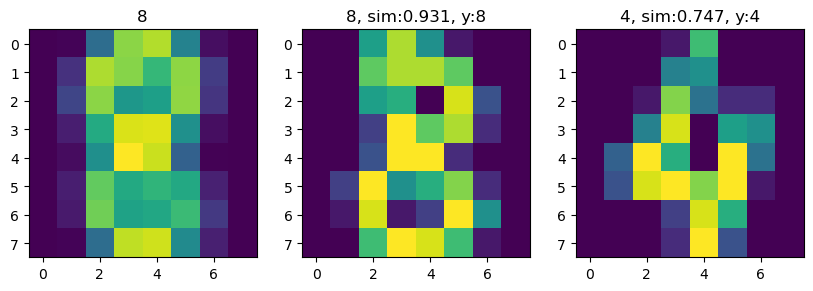

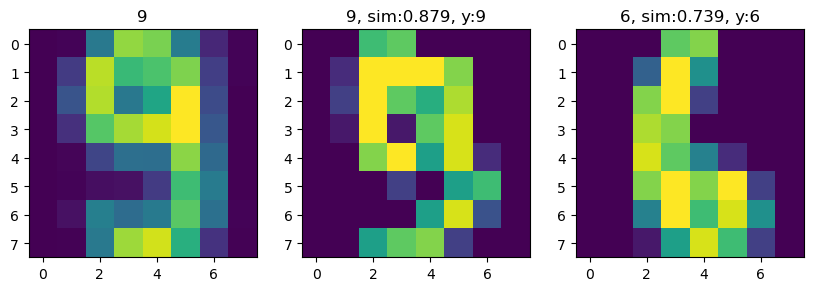

In [82]:
from numpy import linalg
from sklearn.metrics.pairwise import cosine_similarity

mean_imgs = np.array([digits.data[digits.target==i].mean(axis=0) for i in range(10)])


rawNorm = np.array([row/linalg.norm(row, 2) for row in digits.data])

#print("L2 Norm Raw data: ", rawNorm[:1])

meanNorm = np.array([row/linalg.norm(row, 2) for row in mean_imgs])
#print("L2 Norm of mean images: ", meanNorm[:1])

sim_matrix = cosine_similarity(meanNorm, rawNorm)
print("Cosine Similarity:\n", sim_matrix)
print(sim_matrix.shape)


for i in range(0, 10):

    min_idx = np.argmin(sim_matrix[:,i])
    max_idx = np.argmax(sim_matrix[:,i])

    fig, axs = plt.subplots(1,3,figsize=(10,10))
    
    # reference image
    axs[0].set_title(f"{i}")        
    axs[0].imshow(mean_imgs[i].reshape(8,8))
    
    # image and data with highest similarity to reference
    axs[1].set_title(f"{max_idx}, sim:{sim_matrix[max_idx, i]:.3f}, y:{digits.target[max_idx]}")
    axs[1].imshow(digits.data[max_idx].reshape(8,8))
    
    # image and data with lowest similarity to reference
    axs[2].set_title(f"{min_idx}, sim:{sim_matrix[min_idx, i]:.3f}, y:{digits.target[min_idx]}")
    axs[2].imshow(digits.data[min_idx].reshape(8,8))

plt.show()

KNN

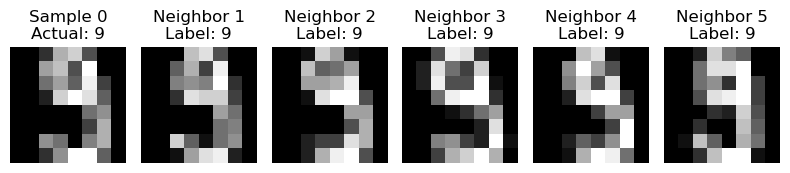

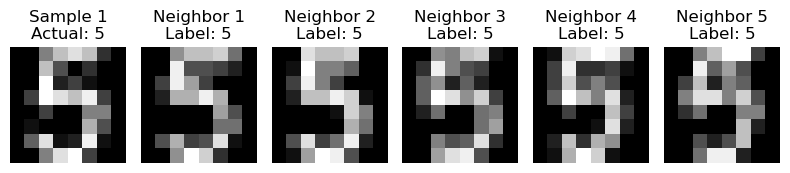

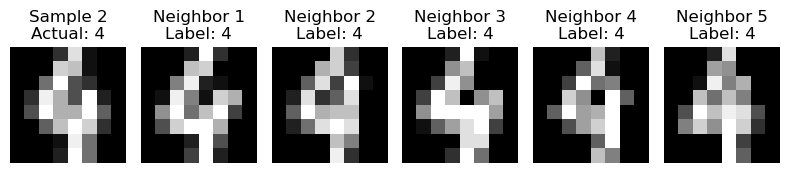

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       0.95      1.00      0.97        55
           2       1.00      0.98      0.99        58
           3       0.98      0.98      0.98        59
           4       0.98      1.00      0.99        50
           5       1.00      0.98      0.99        50
           6       0.98      1.00      0.99        50
           7       0.96      1.00      0.98        50
           8       0.98      0.93      0.95        54
           9       1.00      0.96      0.98        55

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



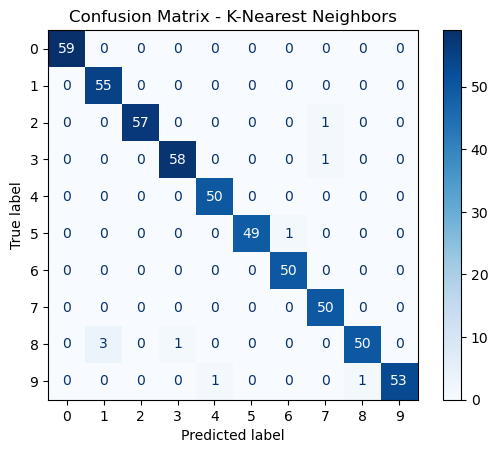

In [83]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier


knnModel = KNeighborsClassifier(n_neighbors=5, algorithm='brute')

knnModel.fit(X_train,y_train)

predictions = knnModel.predict(X_test)

print(metrics.classification_report(y_test, predictions))

knn_confusion_matrix = metrics.confusion_matrix(y_test, predictions)
matrix = ConfusionMatrixDisplay(confusion_matrix=knn_confusion_matrix)
matrix.plot(cmap="Blues", values_format="d")
plt.title('Confusion Matrix - K-Nearest Neighbors')
plt.show()

K-Means

c:\Users\jonat\anaconda3\envs\EDAN96\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\jonat\anaconda3\envs\EDAN96\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


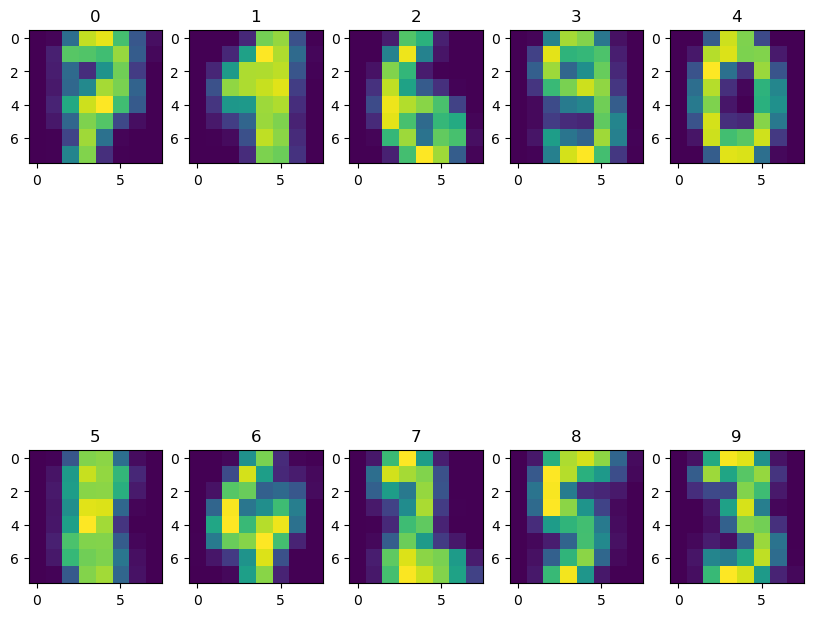

In [84]:
from sklearn.cluster import KMeans

kMeansModel = KMeans(n_clusters=10)

clusters = kMeansModel.fit(X_train)

predicitons = kMeansModel.predict(X_test)

cluster_centers  =  clusters.cluster_centers_
 
#plotting the results:

fig, axs = plt.subplots(2,5,figsize=(10,10))
    
for i in range(10):
    axs[i//5, i%5].set_title(f"{i}")        
    axs[i//5, i%5].imshow(cluster_centers[i].reshape(8,8))







K-Means clustering scatter

Text(0.5, 1.0, 'K-Means clusters')

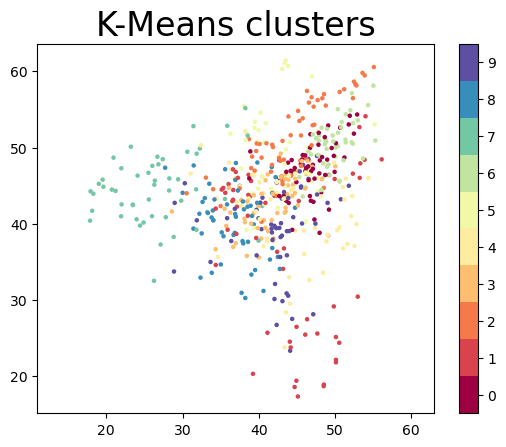

In [85]:
# Clustering
kMeans_embedding = kMeansModel.transform(X_test)

plt.scatter(kMeans_embedding[:, 0], kMeans_embedding[:, 1], c=y_test, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('K-Means clusters', fontsize=24)

Evaluation

In [86]:
kMeans_predictions = kMeansModel.predict(X_test)

print("Completeness score: ", metrics.completeness_score( y_test, kMeans_predictions)) # wether all data points that are members of a given class belong to the same cluster.
print("Homogeneity score: ", metrics.homogeneity_score( y_test, kMeans_predictions)) # All cluster contain only a data point which are members of a single class.

print("Adjusted mutual info: " , metrics.adjusted_mutual_info_score( y_test, kMeans_predictions)) # Based on chance 

Completeness score:  0.7469983674349363
Homogeneity score:  0.7406358155110487
Adjusted mutual info:  0.7346598229695633


plot the 5 nearest neighbours for the first three classified samples from the test set

In [ ]:
# Get the indices of the first three samples you want to plot
indices_to_plot = [0, 1, 2]

for idx in indices_to_plot:
    # Get the features of the sample
    sample = X_test[idx].reshape(1, -1)
    
    # Find the indices of the 5 nearest neighbors for the current sample
    distances, neighbors = knnModel.kneighbors(sample, n_neighbors=5)
    
    # Plot the current sample along with its 5 nearest neighbors
    plt.figure(figsize=(8, 4))

    # Plot the current sample
    plt.subplot(2, 6, 1)
    plt.imshow(sample.reshape(8, 8), cmap='gray')
    plt.title(f"Sample {idx}\nActual: {y_test[idx]}")
    plt.axis('off')

    # Plot the 5 nearest neighbors
    for i, neighbor_idx in enumerate(neighbors[0]):
        plt.subplot(2, 6, i + 2)
        plt.imshow(X_train[neighbor_idx].reshape(8, 8), cmap='gray')
        plt.title(f"Neighbor {i+1}\nLabel: {y_train[neighbor_idx]}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()